In [106]:
! pip install researchpy



In [504]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import datetime

## stat imports
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

import researchpy as rp
import scipy.stats as stats
from scipy.stats import skew 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 150)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#reset pd.reset_option('display.float_format')

from numpy import linalg as LA

from IPython.display import clear_output

torch.manual_seed(1)

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Others
import nltk
import string
import re
from collections import Counter
from matplotlib import pyplot

from nltk.stem import SnowballStemmer
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.manifold import TSNE

import csv

from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split

#tensorflow
import tensorflow.keras.backend as K
import tensorflow as tf

#critical function spacing print
def v():
  print("\n")
  return None

v()
print("[[IMPORT OK]]")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aryavish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



[[IMPORT OK]]


In [108]:
!pwd
import os

from google.colab import drive
drive.mount('/content/drive') 

/content/drive/My Drive/Capcelona/Deals/Bus Dev/coursera review crap/math review/GMU Dept of Math/pred ana/OR 610 DLNN/hw/proj
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
os.chdir("/content/drive/My Drive/Capcelona/Deals/Bus Dev/coursera review crap/math review/GMU Dept of Math/pred ana/OR 610 DLNN/hw/proj")

In [3]:
#play with twitter data

data = pd.read_csv("dataset/twitterfinal.csv", engine='python', header=None)



data.index
data.head()
list(data)
v()
data.shape

RangeIndex(start=0, stop=1600000, step=1)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


[0, 1, 2, 3, 4, 5]

(1600000, 6)

In [4]:
data.rename(columns={0: 'target',1: 'id', 2: 'date', 3: 'flag', 4: 'user', 5: 'text' }, inplace=True)

# polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

In [5]:
data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
data.isnull().sum() / data.shape[0] ## no nulls

target   0.00000
id       0.00000
date     0.00000
flag     0.00000
user     0.00000
text     0.00000
dtype: float64

In [7]:
# basic EDA on his tweets

data['twlength'] = data.text.apply(lambda x: len(x))

data.date = pd.to_datetime(data['date'])

data['tw_day'] = [d.date() for d in data['date']]
data['tw_time'] = [d.time() for d in data['date']]

/home/aryavish/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning:

tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



In [8]:
data.head()

,target,id,date,flag,user,text,twlength,tw_day,tw_time
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57


In [9]:
data.twlength.describe() #outliers

count   1600000.00000
mean         74.04177
std          36.38800
min           6.00000
25%          44.00000
50%          69.00000
75%         104.00000
max         359.00000
Name: twlength, dtype: float64

In [10]:
cap = 280 # MAX tweet length as of 10/2020

data = data[data.twlength <= cap]



count   1599999.00000
mean         74.04159
std          36.38731
min           6.00000
25%          44.00000
50%          69.00000
75%         104.00000
max         235.00000
Name: twlength, dtype: float64

0.2629637089661638

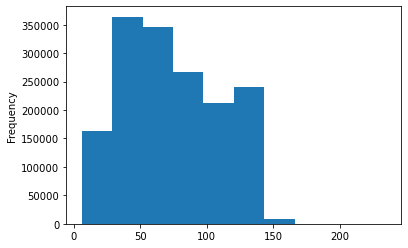

In [11]:
data.twlength.plot.hist()

data.twlength.describe()

v()

skew(data.twlength) #mean tweet length of 75



In [12]:
data.groupby('tw_day').agg(vcount = ('id','count')).describe() #hes tweeting 16x a day?

v()

oldest = min(data.tw_day)
v()
newest = max(data.tw_day)

dateper = (newest - oldest).days

oldest;v() # 1/1/17
newest;v() # 10/2/20
dateper # 1370 days

print("\n mean tweets per day is: ",data.shape[0] / dateper)

,vcount
count,48.00000
mean,33333.31250
std,32945.54055
min,169.00000
25%,8508.25000
50%,19077.00000
75%,43355.00000
max,111676.00000


datetime.date(2009, 4, 6)

datetime.date(2009, 6, 25)

80


 mean tweets per day is:  19999.9875


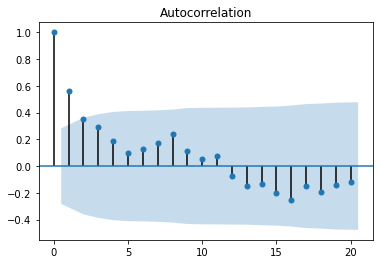

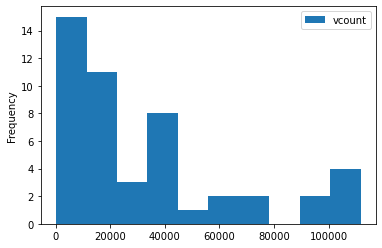

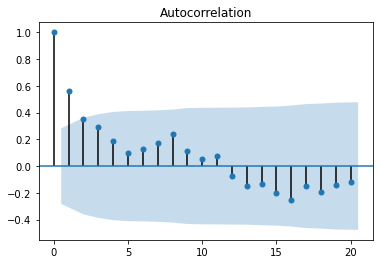

In [13]:
twperday = data.groupby('tw_day').agg(vcount = ('id','count'))

twperday.plot.hist()

plot_acf(twperday.vcount, lags=20) #clear indication of trend and looks like some periodicitity at lag = 7 --> weekly

In [14]:
## explore tweeting times

data.tw_time.describe()
v()
min(data.tw_time)
v()
max(data.tw_time) #he tweets 24 hrs a day

# add hour
data['hour'] = data.tw_time.apply(lambda x: x.hour)

twtime = data.groupby('hour').agg(vc = ('id','count'))


count      1599999
unique       86386
top       07:29:48
freq            66
Name: tw_time, dtype: object

datetime.time(0, 0)

datetime.time(23, 59, 59)

<ipython-input-14-49c72c71dee6>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



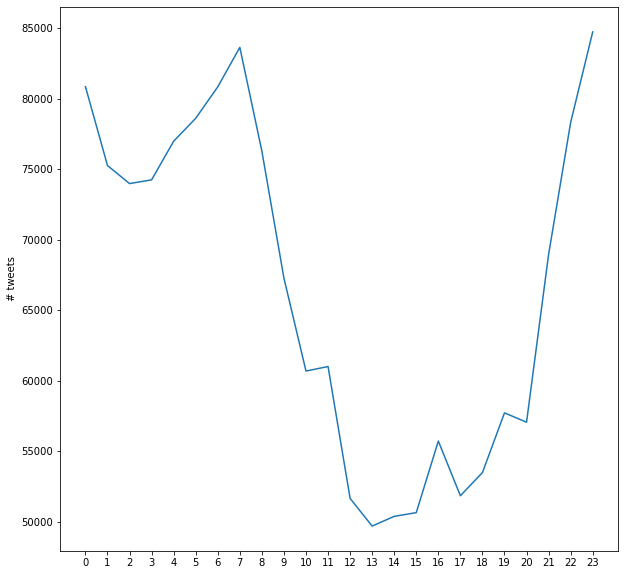

In [15]:
plt.figure(figsize=(10,10))
plt.plot(twtime.index,twtime.vc)
plt.ylabel("# tweets")
plt.xticks(twtime.index)
clear_output() 

#tweet peaks around 12-1pm, significant late night tweeting between 2-3AM and late night 10-11PM
#suspect he's asleep 4-8AM

##meaningless analysis since not normalized for specific time region

array([0, 4])

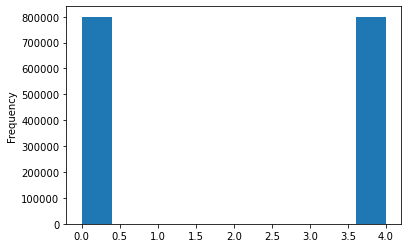

In [16]:
data.target.plot.hist()
v()
data.target.unique() ##this data ONLY contains negative and positive tweets


In [17]:
#unique words eda

stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(data.text)

df_words = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)


In [18]:
df_words.shape #686k unique words

df_words.rename(columns={0: 'vcount'}, inplace=True)



(686634, 1)

In [19]:
df_words.head(10000).describe()

,vcount
count,10000.00000
mean,1028.79710
std,4062.55795
min,78.00000
25%,120.00000
50%,211.00000
75%,546.00000
max,91332.00000


<Figure size 2160x720 with 0 Axes>

([<matplotlib.axis.XTick at 0x7f4060644ca0>,
 <a list of 4 Text major ticklabel objects>)

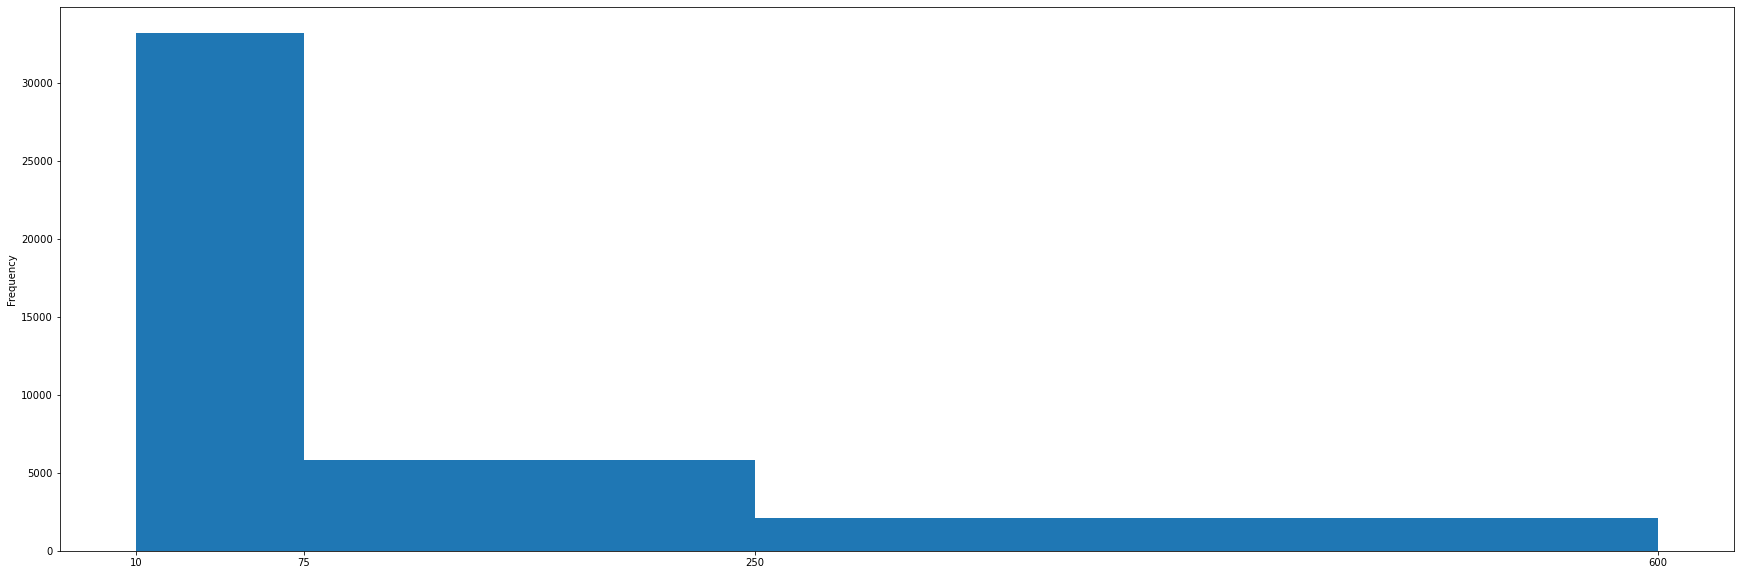

In [20]:
binlist = [10,75,250,600]
binwidth = 100

plt.figure(figsize=[30,10])
df_words.vcount.plot.hist(bins=binlist)
plt.xticks(binlist)

In [21]:
df_words.vcount.describe()

df_words[df_words.vcount == 91332]

count   686634.00000
mean        17.74083
std        505.45857
min          1.00000
25%          1.00000
50%          1.00000
75%          2.00000
max      91332.00000
Name: vcount, dtype: float64

,vcount
good,91332


In [22]:
df_words.head(68000).describe() #90th per centile

,vcount
count,68000.00000
mean,165.83534
std,1598.59065
min,6.00000
25%,8.00000
50%,13.00000
75%,34.00000
max,91332.00000


In [23]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,22
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,22
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,22
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,22
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,22
...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,8
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,8
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,8
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,8


In [238]:
## text preprocessing

## this needs to be augmented after reviewing top word frequences, for ex need to remmove https://, re, and other crap -- review individually analysis to be done in excel

def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"http://", " ", text)
    text = re.sub(r"http", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text
    


In [25]:
data['clean_tweet'] = data.text.apply(lambda x: clean_text(x))

<ipython-input-25-fc12198f2792>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
data['cl_twlength'] = data.clean_tweet.apply(lambda x: len(x))

<ipython-input-26-9387d1370271>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,22,switchfoot http : twitpic com 2y1zl awww that ...,88
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,22,upset ca not updat facebook text it might cri ...,77
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,22,kenichan dive mani time ball manag save 50 res...,53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,22,whole bodi feel itchi like fire,31
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,22,nationwideclass no behav all i am mad here ca ...,59
...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,8,woke up school best feel ever,29
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,8,thewdb com cool hear old walt interview ! http...,62
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,8,readi mojo makeov ask detail,28
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,8,happi 38th birthday boo alll time ! ! ! tupac ...,58


In [28]:
data.reset_index(level=0, inplace=True)

In [29]:
data.drop('index', axis=1, inplace=True)

/home/aryavish/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,22,switchfoot http : twitpic com 2y1zl awww that ...,88
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,22,upset ca not updat facebook text it might cri ...,77
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,22,kenichan dive mani time ball manag save 50 res...,53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,22,whole bodi feel itchi like fire,31
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,22,nationwideclass no behav all i am mad here ca ...,59
...,...,...,...,...,...,...,...,...,...,...,...,...
1599994,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,8,woke up school best feel ever,29
1599995,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,8,thewdb com cool hear old walt interview ! http...,62
1599996,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,8,readi mojo makeov ask detail,28
1599997,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,8,happi 38th birthday boo alll time ! ! ! tupac ...,58


In [282]:
##downsample to 100k 50/50 split

down_sample = 100000

neg_index = np.random.choice(data[data.target == 0].index, size=int(.5*down_sample), replace=False)
pos_index = np.random.choice(data[data.target == 4].index, size=int(.5*down_sample), replace=False)

red_index = np.concatenate((neg_index, pos_index))

red_data = data.iloc[red_index,:]



In [283]:
red_data.shape

red_data.head()

(100000, 12)

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
587938,0,2216495077,2009-06-17 19:33:34,NO_QUERY,NKOTBsSaugaGirl,@1045CHUMFM calling now for the contest! no on...,62,2009-06-17,19:33:34,19,1045chumfm call contest ! one answer !,38
94280,0,1770999153,2009-05-11 22:52:30,NO_QUERY,iitskayy,bored! dont want skl to be an even day tmrw e...,63,2009-05-11,22:52:30,22,bore ! dont want skl even day tmrw night twittler,49
434365,0,2065169856,2009-06-07 08:02:39,NO_QUERY,jennymcniven,five years ago I went to the TONY'S... tonight...,77,2009-06-07,08:02:39,8,five year ago went toni tonight i am watch couch,48
718027,0,2260180192,2009-06-20 18:48:05,NO_QUERY,NiqueBaybee189,at my grandma's just found out about a friend ...,69,2009-06-20,18:48:05,18,grandma found friend left st ambros ! ! !,41
72367,0,1694210811,2009-05-04 01:34:56,NO_QUERY,youngparmesan,@cimangss Why did it bring you to tears? Awh,45,2009-05-04,01:34:56,1,cimangss bring tear awh,23


In [284]:
red_data.reset_index(level=0, inplace=True)

red_data

,index,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,587938,0,2216495077,2009-06-17 19:33:34,NO_QUERY,NKOTBsSaugaGirl,@1045CHUMFM calling now for the contest! no on...,62,2009-06-17,19:33:34,19,1045chumfm call contest ! one answer !,38
1,94280,0,1770999153,2009-05-11 22:52:30,NO_QUERY,iitskayy,bored! dont want skl to be an even day tmrw e...,63,2009-05-11,22:52:30,22,bore ! dont want skl even day tmrw night twittler,49
2,434365,0,2065169856,2009-06-07 08:02:39,NO_QUERY,jennymcniven,five years ago I went to the TONY'S... tonight...,77,2009-06-07,08:02:39,8,five year ago went toni tonight i am watch couch,48
3,718027,0,2260180192,2009-06-20 18:48:05,NO_QUERY,NiqueBaybee189,at my grandma's just found out about a friend ...,69,2009-06-20,18:48:05,18,grandma found friend left st ambros ! ! !,41
4,72367,0,1694210811,2009-05-04 01:34:56,NO_QUERY,youngparmesan,@cimangss Why did it bring you to tears? Awh,45,2009-05-04,01:34:56,1,cimangss bring tear awh,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1246405,4,1995296671,2009-06-01 13:15:51,NO_QUERY,AlexHale,Just heard Demi Lovato on BBC Radio 1. Just t...,72,2009-06-01,13:15:51,13,heard demi lovato bbc radio thought like know,45
99996,947014,4,1822901171,2009-05-16 20:39:00,NO_QUERY,lkelly56,"@JessicaNTurner Loved Bride Wars, so funny!!!!!",48,2009-05-16,20:39:00,20,jessicanturn love bride war funni ! ! ! ! !,43
99997,1031499,4,1933071896,2009-05-26 22:55:28,NO_QUERY,Oracl,@peon374 Agree totally!!,25,2009-05-26,22:55:28,22,peon374 agre total ! !,22
99998,1321884,4,2014736182,2009-06-03 02:31:01,NO_QUERY,pornobobbie,hey twitter peeps! if you're a big fan of ice...,134,2009-06-03,02:31:01,2,hey twitter peep ! big fan ice cold sweet leaf...,97


In [288]:
red_data.target = red_data.target.apply(lambda x: 1 if x == 4 else 0)


/home/aryavish/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [325]:
red_data

,index,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,587938,0,2216495077,2009-06-17 19:33:34,NO_QUERY,NKOTBsSaugaGirl,@1045CHUMFM calling now for the contest! no on...,62,2009-06-17,19:33:34,19,1045chumfm call contest ! one answer !,38
1,94280,0,1770999153,2009-05-11 22:52:30,NO_QUERY,iitskayy,bored! dont want skl to be an even day tmrw e...,63,2009-05-11,22:52:30,22,bore ! dont want skl even day tmrw night twittler,49
2,434365,0,2065169856,2009-06-07 08:02:39,NO_QUERY,jennymcniven,five years ago I went to the TONY'S... tonight...,77,2009-06-07,08:02:39,8,five year ago went toni tonight i am watch couch,48
3,718027,0,2260180192,2009-06-20 18:48:05,NO_QUERY,NiqueBaybee189,at my grandma's just found out about a friend ...,69,2009-06-20,18:48:05,18,grandma found friend left st ambros ! ! !,41
4,72367,0,1694210811,2009-05-04 01:34:56,NO_QUERY,youngparmesan,@cimangss Why did it bring you to tears? Awh,45,2009-05-04,01:34:56,1,cimangss bring tear awh,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1246405,1,1995296671,2009-06-01 13:15:51,NO_QUERY,AlexHale,Just heard Demi Lovato on BBC Radio 1. Just t...,72,2009-06-01,13:15:51,13,heard demi lovato bbc radio thought like know,45
99996,947014,1,1822901171,2009-05-16 20:39:00,NO_QUERY,lkelly56,"@JessicaNTurner Loved Bride Wars, so funny!!!!!",48,2009-05-16,20:39:00,20,jessicanturn love bride war funni ! ! ! ! !,43
99997,1031499,1,1933071896,2009-05-26 22:55:28,NO_QUERY,Oracl,@peon374 Agree totally!!,25,2009-05-26,22:55:28,22,peon374 agre total ! !,22
99998,1321884,1,2014736182,2009-06-03 02:31:01,NO_QUERY,pornobobbie,hey twitter peeps! if you're a big fan of ice...,134,2009-06-03,02:31:01,2,hey twitter peep ! big fan ice cold sweet leaf...,97


In [326]:
red_data.target

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: target, Length: 100000, dtype: int64

In [231]:
## N-GRAM UNI BI TRI ANAL

#bi-gram
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_bigram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_bigram.rename(columns={0: 'vcount'}, inplace=True)

#tri-gram
co = CountVectorizer(ngram_range=(3,3),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_trigram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_trigram.rename(columns={0: 'vcount'}, inplace=True)

#4-gram
co = CountVectorizer(ngram_range=(4,4),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_4gram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_4gram.rename(columns={0: 'vcount'}, inplace=True)

#5-gram
co = CountVectorizer(ngram_range=(5,5),stop_words=stops)
counts = co.fit_transform(red_data.clean_tweet)
df_5gram = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)
df_5gram.rename(columns={0: 'vcount'}, inplace=True)


In [232]:
df_bigram.shape

bigram_top20 = np.sum(df_bigram.head(20).vcount)

df_bigram

bigram_top20 #total counts in data

(433363, 1)

,vcount
bit ly,823
last night,776
good morn,661
ca wait,621
feel like,589
...,...
grapeseedco hit,1
grapefruit orang,1
grapefruit juic,1
grapefruit confus,1


8013

In [234]:
df_trigram.shape

trigram_top20 = np.sum(df_trigram.head(20).vcount)

trigram_top20

df_trigram

(522134, 1)

1609

,vcount
happi mother day,115
ca wait see,110
day use www,105
get 100 follow,105
follow day use,105
...,...
good check repli,1
good check global,1
good chat tue,1
good chat thank,1


In [235]:
df_4gram.shape

df_4gram_top20 = np.sum(df_4gram.head(20).vcount)

df_4gram_top20

(447003, 1)

1117

In [236]:
df_5gram.shape

df_5gram_top20 = np.sum(df_5gram.head(20).vcount)

df_5gram_top20

(365303, 1)

987

array([[   2, 8013],
       [   3, 1609],
       [   4, 1117],
       [   5,  987]])

<BarContainer object of 4 artists>

Text(0.5, 0, 'N-gram')

([<matplotlib.axis.XTick at 0x7f406a8a39d0>,
 <a list of 4 Text major ticklabel objects>)

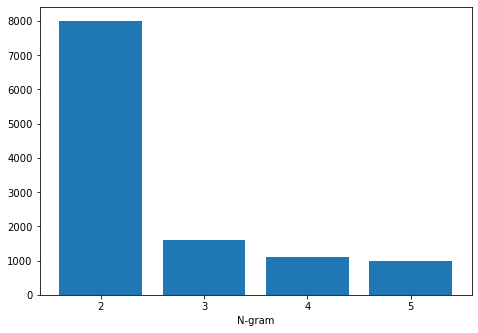

In [237]:
## summary N-gram analysis

ngrams = np.array([(2,bigram_top20),(3,trigram_top20),(4,df_4gram_top20),(5,df_5gram_top20)])

ngrams

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ngrams[:,0],ngrams[:,1])
ax.set_xlabel('N-gram')
plt.xticks(ngrams[:,0])
plt.show()


count   100000.00000
mean        47.69062
std         24.07830
min          0.00000
25%         28.00000
50%         45.00000
75%         66.00000
max        214.00000
Name: cl_twlength, dtype: float64

82.0

90.0

(array([ 14698.,  46995.,  73847.,  92438.,  99342.,  99979.,  99993.,
         99997.,  99998., 100000.]),
 array([  0. ,  21.4,  42.8,  64.2,  85.6, 107. , 128.4, 149.8, 171.2,
        192.6, 214. ]),
 <a list of 1 Patch objects>)

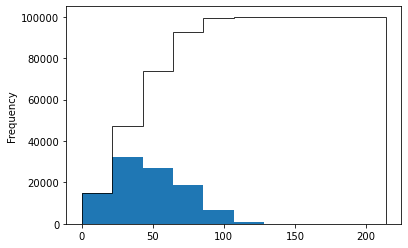

In [166]:
red_data.cl_twlength.describe()

#90th per centile
v()
np.percentile(red_data.cl_twlength,90)
np.percentile(red_data.cl_twlength,95)
#tweet length of 82 90%> in length than other tweets; suggest setting sequence dim to 85,  95% @ 90

red_data.cl_twlength.plot.hist()

plt.hist(red_data.cl_twlength, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')

In [571]:
## tokenize each word in tweet
##INPUT LENGHT HERE

maxtw_length = 90 #95% quantile as confirmed up top
vocabulary_size = 40000

tokenizer = Tokenizer()
tokenizer.fit_on_texts(red_data.clean_tweet)
sequences = tokenizer.texts_to_sequences(red_data.clean_tweet)
tk_data = pad_sequences(sequences, maxlen=maxtw_length)



In [576]:
tk_data # all tweets sequenced using token word indexer and padded to max tweet lngth

np.amax(tk_data)

tk_data.shape

array([[    0,     0,     0, ...,  1437,    21,   569],
       [    0,     0,     0, ...,  1843,    32, 22337],
       [    0,     0,     0, ...,     2,    35,  1368],
       ...,
       [    0,     0,     0, ..., 83785,   480,   257],
       [    0,     0,     0, ..., 83786,   585,  1823],
       [    0,     0,     0, ...,    33,     5,     4]], dtype=int32)

83787

(100000, 90)

In [575]:
label = red_data.target

label.shape

(100000,)

In [577]:
#### SPLIT DATA TEST/TRAIN

testsize = .20

xtrain, xtest, ytrain, ytest = train_test_split(tk_data, label, test_size=testsize, random_state=42)


##pytorch expansion only
ytrain_pyt = np.expand_dims(ytrain, axis=1)
xtrain_pyt = np.concatenate((xtrain, ytrain_pyt), axis=1)

ytest_pyt = np.expand_dims(ytest, axis=1)
xtest_pyt = np.concatenate((xtest, ytest_pyt), axis=1)

In [920]:
np.unique(ytrain)

array([0, 1])

In [562]:
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
import tensorflow.keras.backend as K
import tensorflow as tf


cnnvocab = len(tokenizer.word_index)+1

# Embedding(cnnvocab, length of word vector dimension, twweet length, name) 
#GOOD11111111111111111111111111111111111111111111111

model = Sequential()
model.add(Embedding(cnnvocab, 100, input_length=maxtw_length, name="embedding"))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5, input_shape=(89,)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 90, 100)           8378800   
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 89, 32)            6432      
_________________________________________________________________
global_average_pooling1d_41  (None, 32)                0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 32)                0         
_________________________________________________________________
flatten_70 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_69 (Dense)             (None, 1)               

In [917]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


print(tf.__version__)

xtest_tf.shape


Num GPUs Available:  0
2.3.1


TensorShape([20000, 90])

In [919]:
cnnvocab = len(tokenizer.word_index)+1

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(xtrain, ytrain, batch_size = 8000, epochs=5, verbose=2, validation_data=(xtest,ytest), shuffle=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
v()

print('Test Accuracy: %f' % (acc*100))

/home/aryavish/anaconda3/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3349: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.



Epoch 1/5


KeyboardInterrupt: 

In [918]:
cnnvocab

83788

In [581]:
weights = model.get_layer('embedding').get_weights()[0]
print(weights.shape) 

type(weights)

#np.savetxt("weights_emb_cnn1.csv", weights, delimiter=",")

(83788, 100)


numpy.ndarray

In [599]:
word_count = [tokenizer.word_counts[key] for key in tokenizer.word_counts]

#word_count = word_count.sort(reverse=True)
df_wordc = pd.DataFrame(word_count)
df_wordc.rename(columns={0: 'wc'}, inplace=True)

In [600]:
df_wordc.sort_values(by='wc', ascending=False, inplace=True)


top_words = list(df_wordc.head(50).wc)

In [601]:
top_words = [word for word, count in tokenizer.word_counts.items() if count in top_words]

top_words

['one',
 'want',
 'day',
 'night',
 'i',
 'am',
 'watch',
 'still',
 'back',
 'work',
 'home',
 'lol',
 'see',
 'much',
 'http',
 'com',
 'miss',
 'you',
 'think',
 'need',
 'got',
 'not',
 'get',
 'new',
 'today',
 'go',
 'twitter',
 'time',
 'realli',
 'make',
 'know',
 'morn',
 'hope',
 'ca',
 'feel',
 'come',
 'good',
 'will',
 'me',
 'last',
 'that',
 'would',
 'it',
 'love',
 'well',
 'like',
 'quot',
 'amp',
 'look',
 'thank']

In [602]:
top_words_ind = list(map(tokenizer.word_index.get, top_words))

In [603]:
words = [(top_words_ind[x], top_words[x]) for x in range(len(top_words))]

words

[(21, 'one'),
 (19, 'want'),
 (4, 'day'),
 (32, 'night'),
 (1, 'i'),
 (2, 'am'),
 (35, 'watch'),
 (34, 'still'),
 (20, 'back'),
 (6, 'work'),
 (40, 'home'),
 (15, 'lol'),
 (28, 'see'),
 (45, 'much'),
 (9, 'http'),
 (23, 'com'),
 (17, 'miss'),
 (50, 'you'),
 (26, 'think'),
 (36, 'need'),
 (14, 'got'),
 (16, 'not'),
 (3, 'get'),
 (39, 'new'),
 (12, 'today'),
 (10, 'go'),
 (46, 'twitter'),
 (13, 'time'),
 (27, 'realli'),
 (38, 'make'),
 (22, 'know'),
 (48, 'morn'),
 (33, 'hope'),
 (30, 'ca'),
 (25, 'feel'),
 (43, 'come'),
 (5, 'good'),
 (42, 'will'),
 (47, 'me'),
 (49, 'last'),
 (31, 'that'),
 (41, 'would'),
 (24, 'it'),
 (8, 'love'),
 (37, 'well'),
 (7, 'like'),
 (11, 'quot'),
 (29, 'amp'),
 (44, 'look'),
 (18, 'thank')]

PCA(n_components=2)

(83625, 2)

<Figure size 720x720 with 0 Axes>

Text(-0.0010130061566824679, -0.010557415417918374, "(21, 'one')")

Text(-0.42867915253452016, 1.2764590016384327, "(19, 'want')")

Text(0.12186703830949051, -0.02306891561419227, "(4, 'day')")

Text(-1.7036824490161862, 0.5928775775038746, "(32, 'night')")

Text(0.6900991657275543, 0.043880902843939674, "(1, 'i')")

Text(-0.8588344894910865, -0.15152877451230318, "(2, 'am')")

Text(-1.3718673014196467, 0.6390791175044254, "(35, 'watch')")

Text(-1.5517767255577253, 0.9029464823796997, "(34, 'still')")

Text(1.3825568077557295, 0.6330272278297111, "(20, 'back')")

Text(0.1131544723186044, 1.1327158783097955, "(6, 'work')")

Text(-1.4598698114690154, -1.5803712935936776, "(40, 'home')")

Text(-0.5478330577864504, -0.15280992379254352, "(15, 'lol')")

Text(-2.4643623700908606, 0.28630273745297563, "(28, 'see')")

Text(0.5485463300314911, 0.8819245085277313, "(45, 'much')")

Text(0.8869258485771941, 0.1272145779470303, "(9, 'http')")

Text(0.7024902973968911, -0.8354006387967683, "(23, 'com')")

Text(0.08778001059896597, 0.4850723970932374, "(17, 'miss')")

Text(-0.5559983401997941, 0.07029290607391803, "(50, 'you')")

Text(-0.673704601306424, -0.4365979145093515, "(26, 'think')")

Text(0.3283877905429284, -0.6605921863739151, "(36, 'need')")

Text(0.5730895693846472, 1.424035314965419, "(14, 'got')")

Text(-1.3040955779698562, 1.1709580438682963, "(16, 'not')")

Text(-0.7218854826720269, 0.7810758576723876, "(3, 'get')")

Text(0.37124273606890945, -0.16311033811543657, "(39, 'new')")

Text(-0.7937700809006902, -0.6823049774730408, "(12, 'today')")

Text(-0.517821432939041, 0.8195216381657028, "(10, 'go')")

Text(-0.6365821980135546, -0.06137536831783157, "(46, 'twitter')")

Text(0.9768209795341452, -0.06588282282346006, "(13, 'time')")

Text(0.34788399861180197, 0.385560144431102, "(27, 'realli')")

Text(1.2096692443227062, -1.3621071247829233, "(38, 'make')")

Text(0.9079705078605725, -1.4609101736653696, "(22, 'know')")

Text(1.6161902422747305, -0.07455765819789249, "(48, 'morn')")

Text(0.7060790065541093, -0.5777129086864139, "(33, 'hope')")

Text(0.9619273876739868, 0.5043225057848243, "(30, 'ca')")

Text(-0.6242152983556044, 0.7592051453733406, "(25, 'feel')")

Text(-0.7597505101877002, -0.854539845357861, "(43, 'come')")

Text(2.862554016580934, 1.3904141974334563, "(5, 'good')")

Text(-1.7399643601310368, -1.6919803000456257, "(42, 'will')")

Text(-1.5864595055103259, 1.888709435964973, "(47, 'me')")

Text(-0.15696613363718898, 1.0398985709944493, "(49, 'last')")

Text(-0.12636909810084904, -0.11256876089697543, "(31, 'that')")

Text(0.6629070138243264, 1.5687414762565461, "(41, 'would')")

Text(2.368389133600345, -0.029708755516982342, "(24, 'it')")

Text(-0.3049469836957797, -1.376791750034423, "(8, 'love')")

Text(0.2750717437288111, 0.67199686533781, "(37, 'well')")

Text(-0.8569699559279351, -1.8123150222032547, "(7, 'like')")

Text(0.5676959245350248, -0.3931790840652826, "(11, 'quot')")

Text(0.9374510415216708, 1.3814298654854924, "(29, 'amp')")

Text(-0.24024651705244662, -1.323160817050539, "(44, 'look')")

Text(-0.1279497595441315, -0.5687083636643854, "(18, 'thank')")

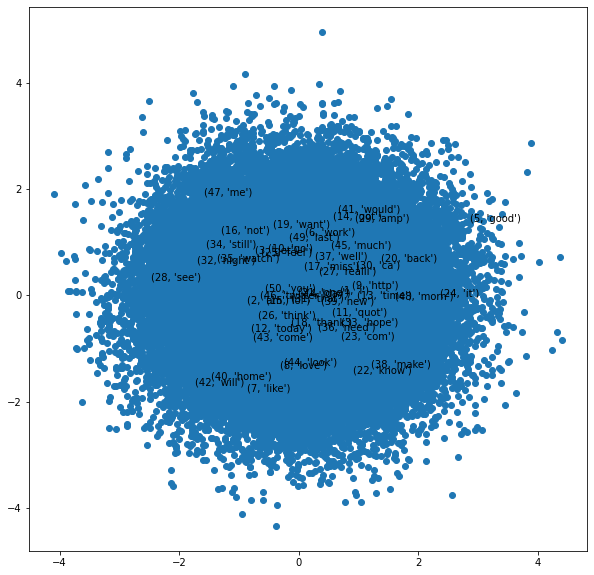

In [604]:


pca = decomposition.PCA(n_components=2)

pca.fit(weights)

X = pca.transform(weights)

X.shape

result = X

pyplot.figure(figsize=(10,10))
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))



pyplot.show()

In [386]:
weights.shape #100 dim per word!!

cnnvocab

max([n for i,n in tokenizer.word_index.items()])

weights[0]

(83625, 100)

83625

83624

array([ 0.00329058,  0.02309463, -0.01260956,  0.01699292, -0.05613225,
        0.02979925,  0.05268583,  0.01216369,  0.05419632, -0.00298881,
       -0.03436717,  0.03704486, -0.04022154, -0.0344171 , -0.04156242,
       -0.04321704,  0.00272977, -0.00128638, -0.02410396, -0.03169641,
       -0.02272655,  0.03915972,  0.00178317, -0.01523028,  0.02082049,
        0.02376198,  0.02858229, -0.01204508,  0.00762836,  0.02104647,
       -0.03275681,  0.0021378 ,  0.00080341, -0.00303346,  0.02179307,
       -0.01216804,  0.05074267, -0.00591302, -0.00507674, -0.04179592,
       -0.03692316, -0.04180422,  0.0007735 , -0.01055756, -0.00190031,
        0.03923646,  0.02926649,  0.03051353, -0.03951034, -0.01754254,
       -0.03957536, -0.04801958,  0.03810098, -0.01011541, -0.01686343,
       -0.03827433, -0.01971509,  0.01104466, -0.01552308,  0.04886518,
       -0.04037427, -0.0424712 ,  0.01087181, -0.04018621,  0.01057433,
       -0.01871627,  0.04685037, -0.03175952,  0.02312838,  0.01

In [745]:
## pytorch CNN2D
# ======================

import torch.nn as nn
import torch.nn.functional as F
import torch


# tokenizer.word_index # contains tokenized words
# weights contains embeddings learned from CNN 1D specs above

INPUT_DIM = cnnvocab
EMBEDDING_DIM = 100
N_FILTERS = 32
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = 1
DROPOUT = 0.50
PAD_IDX = 0     #| token to pad to 0 vector, ie word not in vocab

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
                
            #text = [batch size, sent len]

            embedded = self.embedding(text)

            #embedded = [batch size, sent len, emb dim]

            embedded = embedded.unsqueeze(1)

            #embedded = [batch size, 1, sent len, emb dim]

            conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]

            #conved_n = [batch size, n_filters, sent len - filter_sizes[n] + 1]

            pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

            #pooled_n = [batch size, n_filters]

            cat = self.dropout(torch.cat(pooled, dim = 1))

            #cat = [batch size, n_filters * len(filter_sizes)]
            
            return self.fc(cat)
            






In [746]:
model_pyt = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model_pyt):,} trainable parameters')


The model has 8,407,793 trainable parameters


In [461]:
#pretrained embedding vectors on CNN1D, DO NOT USE IF TRAIN PARAMS SEPARATELY !!!

pretrained_embeddings =  torch.from_numpy(weights)

model_pyt.embedding.weight.data.copy_(pretrained_embeddings) 

model_pyt.embedding.weight.data[0] = torch.zeros(EMBEDDING_DIM) ## set 0 vector to not found word

tensor([[ 0.0033,  0.0231, -0.0126,  ..., -0.0324, -0.0447, -0.0231],
        [-0.0238,  0.0105,  0.0483,  ...,  0.0951,  0.0782,  0.0111],
        [-0.0781,  0.0284,  0.0986,  ...,  0.0203,  0.0189,  0.0181],
        ...,
        [ 0.0188,  0.0224,  0.0254,  ..., -0.0101,  0.0110, -0.0464],
        [-0.0371,  0.0050,  0.0132,  ...,  0.0400, -0.0411, -0.0058],
        [ 0.0388,  0.0231,  0.0344,  ..., -0.0398,  0.0372, -0.0238]])

In [747]:
batch_size = 4000

train_loader = torch.utils.data.DataLoader(dataset=xtrain_pyt, 
                                           batch_size=batch_size, 
                                           shuffle=False)


test_loader = torch.utils.data.DataLoader(dataset=xtest_pyt, 
                                          batch_size=batch_size, 
                                          shuffle=False)

#loads as tensors

In [754]:
import torch.optim as optim

optimizer = optim.Adam(model_pyt.parameters())

criterion = nn.BCEWithLogitsLoss()

optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'params': [0, 1, 2, 3, 4, 5, 6, 7, 8]}]}

In [921]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

def conf_matrix(label_pred, threshold=.50):

    # uses sigmoid activation
    
    v1 = np.array(label_pred)
    tlabel = [v1[x,0].item() for x in range(v1.shape[0])]
    tsig = [torch.sigmoid(v1[x,1]).detach().numpy().item() for x in range(v1.shape[0])]
    tsig = [1 if tsig[x] >= threshold else 0 for x in range(len(tsig))]
    
    labels = np.unique(tlabel)

    a =  metrics.confusion_matrix(tlabel, tsig, labels=labels)

    print("\n Confusion matrix \n")
    print("\n ",pd.DataFrame(a, index=labels, columns=labels))
    #ACTUAL ROWS, PRED COLS
    print("\n actual are rows, predicted are cols")
    return None

In [911]:
global_weights = []


In [909]:
maxlen = xtrain_pyt.shape[1]

def train_epoch(model, optimizer, maxgrad, batchsize=8000):
    loss_log, acc_log, grad_log, tgrad_log = [], [], [], []
    model.train()
    for batch_num, batch in enumerate(train_loader):
        
        data = batch[:,0:maxlen-1]
        target = batch[:,maxlen-1]
        target = target.float()

        optimizer.zero_grad()
        output = model(data).squeeze(1)
        
        acc = binary_accuracy(output, target)
        acc_log.append(acc)
        
        loss = criterion(output, target)
        
        loss.backward()
        
        tgrad_log.extend(torch.reshape(model.convs[0].weight.grad.clone(), (1,N_FILTERS*1*FILTER_SIZES[0]*EMBEDDING_DIM)).detach().numpy())
        tgrad_log.extend(torch.reshape(model.convs[1].weight.grad.clone(), (1,N_FILTERS*1*FILTER_SIZES[1]*EMBEDDING_DIM)).detach().numpy())
        tgrad_log.extend(torch.reshape(model.convs[2].weight.grad.clone(), (1,N_FILTERS*1*FILTER_SIZES[2]*EMBEDDING_DIM)).detach().numpy())
        # get gradient dl/dw of weight params in each N-gram layer
        grad_log.append((batch_num+maxgrad, tgrad_log))
        tgrad_log = []
        
        optimizer.step()
        
        loss = loss.item()
        loss_log.append(loss)
        
    return loss_log, acc_log, grad_log    

def test(model):
    loss_log, acc_log, pred_log, label_log = [], [], [], []
    
    model.eval()
    for batch_num, batch in enumerate(test_loader):    
        
        data = batch[:,0:maxlen-1]
        target = batch[:,maxlen-1]
        target = target.float()
        
        output = model(data).squeeze(1)
        loss = criterion(output, target)

        label_log.extend(target)
        pred_log.extend(output)
        
        acc = binary_accuracy(output, target)
        acc_log.append(acc)
                
        loss = loss.item()
        loss_log.append(loss)
    
    label_pred = list(zip(label_log,pred_log))
    return loss_log, acc_log, label_pred

def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()


def plot_gradient(grad_log):
    gsteps = [grad_log[x][0] for x in range(len(grad_log))]
    gnorms = []
    gcomp = []

    for y in range(len(grad_log)):
        for x in range(len(grad_log[y][1])):
            gcomp.extend(grad_log[y][1][x])
        gcomp = np.array(gcomp)
        gnorms.append(np.linalg.norm(gcomp))
        gcomp = []

    plt.figure(figsize=(10,10))
    plt.plot(gsteps,gnorms)
    plt.xlabel("train steps")
    plt.ylabel("gradient magnitude")
    plt.show()
    
    return None

    
def train(model, opt, n_epochs):
    train_log, train_acc_log, label_pred, grad_log = [], [], [], []
    val_log, val_acc_log, grad_train = [], [], []


    max_grad=0
    for epoch in range(n_epochs):
        print("Epoch {0} of {1}".format(epoch, n_epochs))
        train_loss, train_acc, grad_train = train_epoch(model, opt, max_grad, batchsize=batch_size)
    
        val_loss, val_acc, label_pred = test(model)

        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)
        
        max_grad = max([grad_train[y][0] for y in range(len(grad_train))])+1
        
        grad_log.extend(grad_train)

        steps = xtrain_pyt.shape[0] / batch_size
                       
        #assert False, "VISH-breakpoint"
        val_log.append((steps * (epoch + 1), np.mean(val_loss)))
        val_acc_log.append((steps * (epoch + 1), np.mean(val_acc)))
        
             
        clear_output()
        plot_history(train_log, val_log)    
        plot_history(train_acc_log, val_acc_log, title='accuracy')   
        
        if epoch == n_epochs - 1:
            plot_gradient(grad_log)
            conf_matrix(label_pred)
            
            global global_weights
        
            global_weights = grad_log
            
            
        print("Epoch: {2}, val loss: {0}, val accuracy: {1}".format(np.mean(val_loss), np.mean(val_acc), epoch))




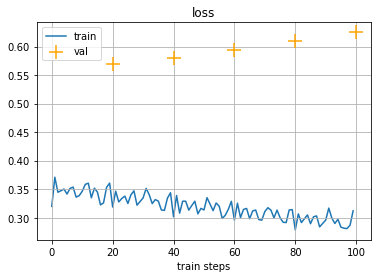

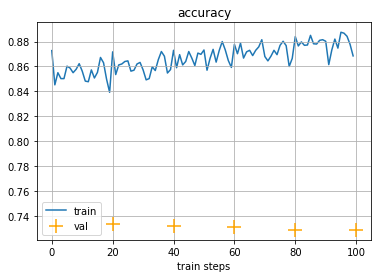

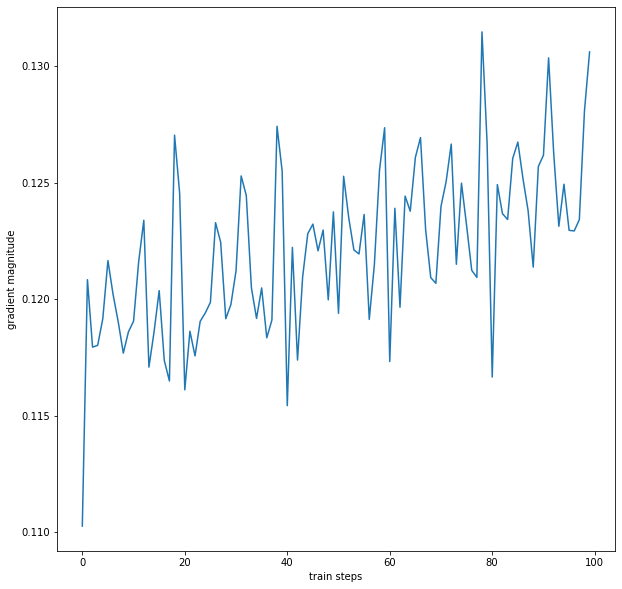


           0.00000  1.00000
0.00000     7359     2676
1.00000     2750     7215

 actual are rows, predicted are cols
Epoch: 4, val loss: 0.6250774383544921, val accuracy: 0.7287000417709351


In [912]:
train(model_pyt, optimizer, 5)

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'steps')

Text(0, 0.5, 'Gradient Magnitude')

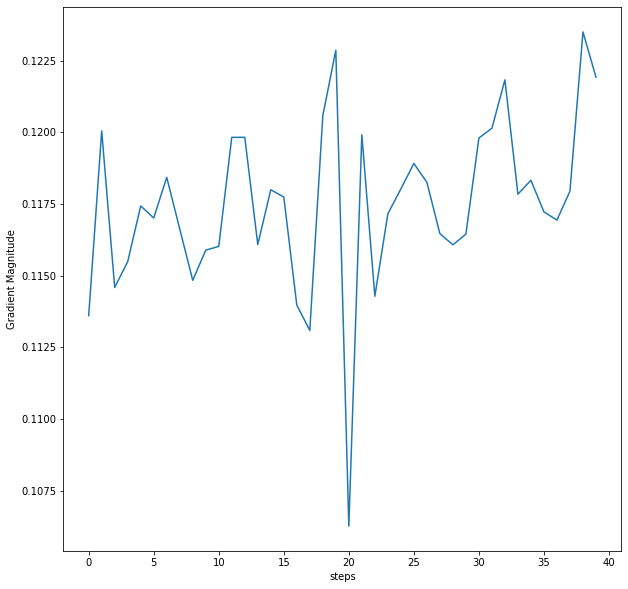

In [908]:
gsteps = [global_weights[x][0] for x in range(len(global_weights))]
gnorms = []
gcomp = []
gorth = []


for y in range(len(global_weights)):
    for x in range(len(global_weights[y][1])):
        gcomp.extend(global_weights[y][1][x])
    gcomp = np.array(gcomp)
    gorth.append((gcomp))
    gnorms.append(np.linalg.norm(gcomp))
    gcomp = []

gnorms
gsteps

clear_output()
plt.figure(figsize=(10,10))
plt.plot(gsteps,gnorms)
plt.xlabel("steps")
plt.ylabel("Gradient Magnitude")

PCA(n_components=2)

(83625, 2)

<Figure size 720x720 with 0 Axes>

Text(-0.0011069908149642551, 0.002004357163888928, "(21, 'one')")

Text(-0.47510305799148006, -0.2912986650467082, "(19, 'want')")

Text(-0.15206706464646647, -0.845411638333469, "(4, 'day')")

Text(0.3103830454932403, 1.5845404979972633, "(32, 'night')")

Text(0.12021110116883323, -2.1968737132237512, "(1, 'i')")

Text(-0.7708486158557555, 1.577567095523818, "(2, 'am')")

Text(-1.5389165349725498, -1.15618217355999, "(35, 'watch')")

Text(-0.6315399183035767, 0.5133232281635245, "(34, 'still')")

Text(-0.40913672872516116, 0.1992958267870231, "(20, 'back')")

Text(-0.515533909644721, -0.8021792654634784, "(6, 'work')")

Text(-0.9382191198258198, -0.29646341086827077, "(40, 'home')")

Text(0.44694102454597334, 0.0792267856743114, "(15, 'lol')")

Text(-0.3495388587402789, 0.7904572129855968, "(28, 'see')")

Text(-1.8737637894224404, -0.4538516687842698, "(45, 'much')")

Text(1.6764630214092981, -1.2702360849720866, "(9, 'http')")

Text(0.09764161654791281, 0.12709003970669083, "(23, 'com')")

Text(0.6364447289701035, -1.276152775369753, "(17, 'miss')")

Text(1.010602557641671, -1.7891164659183745, "(50, 'you')")

Text(1.1242981979719266, 1.3307667443292304, "(26, 'think')")

Text(0.36517638015886256, 0.01725353215558224, "(36, 'need')")

Text(1.5657593659070965, -0.5019436733443746, "(14, 'got')")

Text(-0.5225283452467648, -0.8669408543949801, "(16, 'not')")

Text(-1.3220775279781463, -2.1446454712517014, "(3, 'get')")

Text(-1.9442896709047262, 0.5979034579536696, "(39, 'new')")

Text(-0.7563383381015726, -0.5599599338374565, "(12, 'today')")

Text(-0.017396248018064425, 1.8357529387494527, "(10, 'go')")

Text(-1.124504776961797, -0.9505364178119344, "(46, 'twitter')")

Text(1.4807911664772844, -0.9972741177068869, "(13, 'time')")

Text(-0.9939912710274957, -1.6244217605552664, "(27, 'realli')")

Text(0.6717651819239789, 0.5525794177731843, "(38, 'make')")

Text(-0.7221477740798632, 1.4990329325502387, "(22, 'know')")

Text(1.9362372551515645, 0.25425994572446703, "(48, 'morn')")

Text(-1.0974351891041974, 0.8707973324128626, "(33, 'hope')")

Text(-0.5937973238474998, -1.511700511077886, "(30, 'ca')")

Text(-1.893594800240967, 2.0074232742923073, "(25, 'feel')")

Text(0.10046995570279289, 0.9509523754843908, "(43, 'come')")

Text(1.6701957657592446, -2.3209725095582714, "(5, 'good')")

Text(-0.1877098892927594, 0.5614392913581628, "(42, 'will')")

Text(0.055186228892118626, -1.1751413986051844, "(47, 'me')")

Text(-1.0232348190440514, -1.9580048736263824, "(49, 'last')")

Text(-3.1237327970844544, -0.5093645214726078, "(31, 'that')")

Text(0.4067526057733501, 0.18219349734465592, "(41, 'would')")

Text(0.9988112090716799, 1.6146122548042086, "(24, 'it')")

Text(1.2416186284650008, 1.4125601872386817, "(8, 'love')")

Text(-2.174923720232743, -0.22919214736054735, "(37, 'well')")

Text(0.3396977911199013, -0.7228232825017181, "(7, 'like')")

Text(1.132737332779695, -1.0983414780016565, "(11, 'quot')")

Text(0.05604672322429462, -1.174065966692227, "(29, 'amp')")

Text(-0.04054211288048747, 0.014939157168633584, "(44, 'look')")

Text(1.6462815333877934, -1.0209207021856352, "(18, 'thank')")

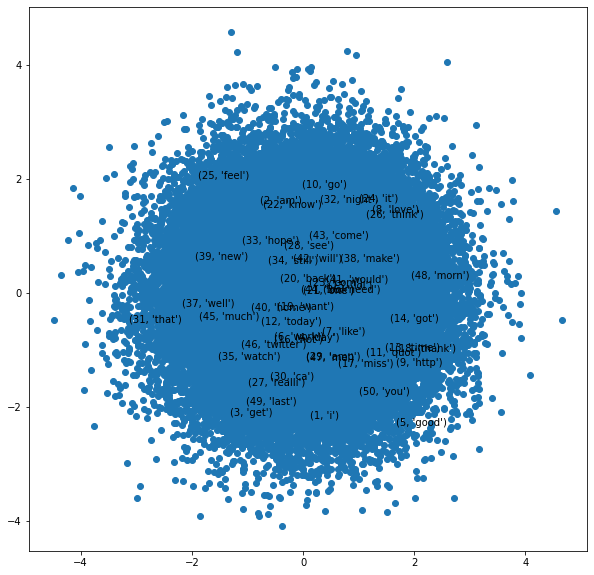

In [594]:
weights = model_pyt.embedding.weight.data

pca = decomposition.PCA(n_components=2)

pca.fit(weights)

X = pca.transform(weights)

X.shape

result = X

pyplot.figure(figsize=(10,10))
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))



pyplot.show()